In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = r"basee_dir/train_dir"
categories = ["drd" , "no_drd" ]
orb = cv2.ORB_create(nfeatures = 10)
data=[]
images= []

In [3]:
for category in categories:
    path= os.path.join(dir,category)
    label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        images.append(drd_image)
      
        try:
            
            drd_image = cv2.resize(drd_image, (96,96))
            image = np.array( drd_image).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            data.append([image,label])
        
        except Exception as e:
            pass
    
       
print(len(data))

371


In [4]:
desList=[]
for category in categories:
    path= os.path.join(dir,category)
    #label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        kp,des = orb.detectAndCompute(drd_image,None)
#         images.append(drd_image)
      
        try:
            
            des = cv2.resize(des, (96,96))
            im = np.array( des).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            desList.append(im)
        
        except Exception as e:
            pass
    
       
print(len(desList))

370


In [5]:
# # #desList= cv2.resize(desList,(128,128))
d= desList[0:370]
print(len(d))

370


In [6]:
import random
random.shuffle(data)
features= []
labels= []

In [7]:
for feature,label in data:
    features.append(feature)
    labels.append(label)
labels= labels[0:370]

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (d, labels , test_size= 0.20)

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Initializing and fitting data to the random forest classifier
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(xtrain, ytrain)

 Accuracy : 71.62162162162163
Prediction is : drd


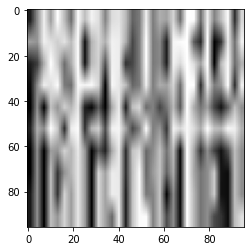

In [16]:
# Making a prediction and calculting the accuracy
y_pred = RandForest_K_best.predict(xtest)



#print("Accuracy: "+str(accuracy_score(xtest, ytest)))

accuracy = RandForest_K_best.score(xtest, ytest)

categories = ["drd" , "no_drd" ]

print(" Accuracy :" , accuracy*100)

print("Prediction is :", categories[y_pred[0]])
drd= xtest[0].reshape(96,96)

plt.imshow(drd, cmap='gray')
plt.show()